## Customer Clustering

### This is the data of online retail store
#### Problem Statement - We aim to segement the Customers based on RFM so that the company can target its customers efficiently.



In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [152]:
# importing dataset
df = pd.read_csv(r'OnlineRetail.csv', header= 0,
                        encoding= 'unicode_escape') 

In [153]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### EDA


In [154]:
df.shape

(541909, 8)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [156]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [157]:
### Finding null values
df.isna().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [158]:
# dropping all null values
df = df.dropna()

In [159]:
df.shape

(406829, 8)

In [160]:
# converting CustomerID into String Datatype
df.CustomerID=df.CustomerID.astype('int')
df.CustomerID=df.CustomerID.astype('str')

### We are going to analysis the Customers based on below 3 factors:
R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

In [161]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


In [162]:
#### number of customers
df.CustomerID.value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15070       1
15753       1
17065       1
16881       1
16995       1
Name: CustomerID, Length: 4372, dtype: int64

In [163]:
### Total Amount
df['total_amount']=df['Quantity'] * df['UnitPrice']
df['total_amount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: total_amount, dtype: float64

In [164]:
#### finding total amount by each customer
df_1=df.groupby('CustomerID')['total_amount'].sum()
df_1.head()

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
Name: total_amount, dtype: float64

In [165]:
#### Frequency : finding total number of items customer has shopped
df_2=df.groupby('CustomerID')['InvoiceNo'].count()
df_2.columns = ['CustomerID','frequency']
df_2.head()

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
Name: InvoiceNo, dtype: int64

In [166]:
#### Recency: number of days since last shopped 


# changing datatype of InvoiceDate column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')



# Recency
df['last_shopping_days']=df['InvoiceDate'].max() - df['InvoiceDate']

In [167]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,last_shopping_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00


In [168]:
## getting the minimum last shopping days for each customers
df_3=df.groupby('CustomerID')['last_shopping_days'].min()
df_3 = df_3.reset_index()
df_3.head()


,CustomerID,last_shopping_days
0,12346,325 days 02:33:00
1,12347,1 days 20:58:00
2,12348,74 days 23:37:00
3,12349,18 days 02:59:00
4,12350,309 days 20:49:00


In [169]:
# getting only days in our df_3 not time
df_3['last_shopping_days'] = df['last_shopping_days'].dt.days
df_3.head()


,CustomerID,last_shopping_days
0,12346,373.0
1,12347,373.0
2,12348,373.0
3,12349,373.0
4,12350,373.0


In [170]:
## Joining the the three dataframes - df_1, df_2 ,df_3
df_new=pd.merge(pd.merge(df_1,df_2,on='CustomerID'),df_3,on='CustomerID')
df_new.head()

,CustomerID,total_amount,InvoiceNo,last_shopping_days
0,12346,0.00,2,373.0
1,12347,4310.00,182,373.0
2,12348,1797.24,31,373.0
3,12349,1757.55,73,373.0
4,12350,334.40,17,373.0


In [171]:
df_new.shape

(4372, 4)

In [172]:
## changing column name of Invoice no to frequency
df_new.rename(columns={'InvoiceNo': 'frequency'}, inplace=True)
df_new.head()

,CustomerID,total_amount,frequency,last_shopping_days
0,12346,0.00,2,373.0
1,12347,4310.00,182,373.0
2,12348,1797.24,31,373.0
3,12349,1757.55,73,373.0
4,12350,334.40,17,373.0


In [173]:
## we can convert frequency column to make it uniformly distributed
df_new['frequency'] = np.log(df_new['frequency'])

In [174]:
df_new.head()

,CustomerID,total_amount,frequency,last_shopping_days
0,12346,0.00,0.693147,373.0
1,12347,4310.00,5.204007,373.0
2,12348,1797.24,3.433987,373.0
3,12349,1757.55,4.290459,373.0
4,12350,334.40,2.833213,373.0


Text(0.5, 0, 'Attributes')

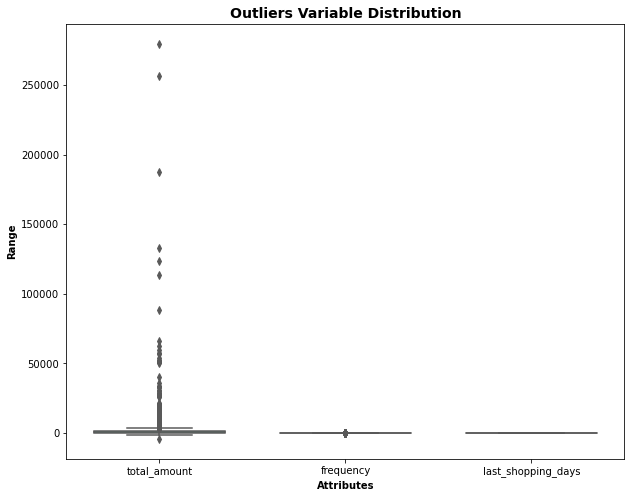

In [175]:
attributes = ['total_amount','frequency','last_shopping_days']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_new[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [178]:
# # Removing (statistical) outliers for total_mount
Q1 = df_new.total_amount.quantile(0.05)
Q3 = df_new.total_amount.quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new.total_amount >= Q1 - 1.5*IQR) & (df_new.total_amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for last_shopping_day
Q1 = df_new.last_shopping_days.quantile(0.05)
Q3 = df_new.last_shopping_days.quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new.last_shopping_days >= Q1 - 1.5*IQR) & (df_new.last_shopping_days <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for frequency
Q1 = df_new.frequency.quantile(0.05)
Q3 = df_new.frequency.quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new.frequency >= Q1 - 1.5*IQR) & (df_new.frequency <= Q3 + 1.5*IQR)]

In [179]:
df_new

,CustomerID,total_amount,frequency,last_shopping_days
0,12346,0.00,0.693147,373.0
1,12347,4310.00,5.204007,373.0
2,12348,1797.24,3.433987,373.0
3,12349,1757.55,4.290459,373.0
4,12350,334.40,2.833213,373.0
...,...,...,...,...
4367,18280,180.60,2.302585,371.0
4368,18281,80.82,1.945910,371.0
4369,18282,176.60,2.564949,371.0
4370,18283,2094.88,6.628041,371.0


In [180]:
## scaling the features 

df_n = df_new[['total_amount', 'frequency', 'last_shopping_days']]

scaler = StandardScaler()

# fit_transform
df_l = scaler.fit_transform(df_n)
df_l.shape

(3134, 3)

In [181]:
df_l =  pd.DataFrame(df_l)
df_l.columns = ['total_amount', 'frequency', 'last_shopping_days']


In [182]:
df_l.head()

,total_amount,frequency,last_shopping_days
0,-0.733638,-2.241310,1.213401
1,1.680931,1.197180,1.213401
2,0.273221,-0.152052,1.213401
3,0.250985,0.500811,1.213401
4,-0.546299,-0.610003,1.213401


In [183]:
df_l.dtypes

total_amount          float64
frequency             float64
last_shopping_days    float64
dtype: object

In [184]:
np.all(np.isfinite(df_l))

True

In [185]:
df_l=df_l.round(4)

In [205]:
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters = i)
    km.fit(df_l)
    wcss.append(km.inertia_)
    

In [206]:
wcss

[9402.023619572936,
 6338.567084260656,
 4423.228059182069,
 3368.579087130978,
 2798.4225437499267,
 2295.878584770938,
 1914.9308373377494,
 1673.7645002893673,
 1464.4494902243312,
 1305.5554410970524,
 1166.7984437690081,
 1033.4716435094426,
 954.0347362504677,
 874.4203657508549]

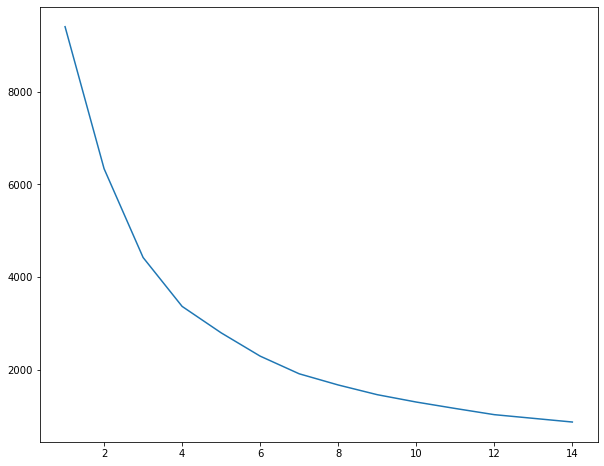

In [207]:
plt.plot(range(1,15),wcss)

In [211]:
range_n_clusters = [i for i in range(2,10)]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_l)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_l, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3617040237630532
For n_clusters=3, the silhouette score is 0.3949475220163865
For n_clusters=4, the silhouette score is 0.3846398828560827
For n_clusters=5, the silhouette score is 0.4211725666675756
For n_clusters=6, the silhouette score is 0.42267064729278864
For n_clusters=7, the silhouette score is 0.4303005777082502
For n_clusters=8, the silhouette score is 0.43414637081619456
For n_clusters=9, the silhouette score is 0.4229382482988427


In [212]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_l)

KMeans(max_iter=50, n_clusters=3)

In [213]:
kmeans.labels_

array([2, 1, 2, ..., 0, 1, 0])

In [214]:
df_l['cluster_no'] = kmeans.labels_

In [215]:
df_l

,total_amount,frequency,last_shopping_days,cluster_no
0,-0.7336,-2.2413,1.2134,2
1,1.6809,1.1972,1.2134,1
2,0.2732,-0.1521,1.2134,2
3,0.2510,0.5008,1.2134,2
4,-0.5463,-0.6100,1.2134,2
...,...,...,...,...
3129,-0.6325,-1.0145,-1.8411,0
3130,-0.6884,-1.2864,-1.8411,0
3131,-0.6347,-0.8145,-1.8411,0
3132,0.4400,2.2827,-1.8411,1


In [227]:
## Number of customers in different clusters.
df_l.cluster_no.value_counts()

0    1749
2     884
1     501
Name: cluster_no, dtype: int64

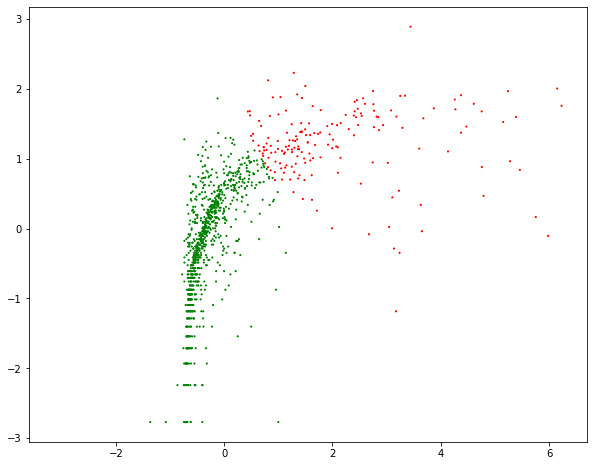

In [226]:
## scatter plot 

plt.scatter(df_l[df_l['cluster_no'] == 0]['total_amount'],df_l[df_l['cluster_no'] == 0]['frequency'],df_l[df_l['cluster_no'] == 0]['last_shopping_days'],color='blue')
plt.scatter(df_l[df_l['cluster_no'] == 1]['total_amount'],df_l[df_l['cluster_no'] == 1]['frequency'],df_l[df_l['cluster_no'] == 1]['last_shopping_days'],color='red')
plt.scatter(df_l[df_l['cluster_no'] == 2]['total_amount'],df_l[df_l['cluster_no'] == 2]['frequency'],df_l[df_l['cluster_no'] == 2]['last_shopping_days'],color='green')



### boxplot for visualization for different clusters

<AxesSubplot:xlabel='cluster_no', ylabel='total_amount'>

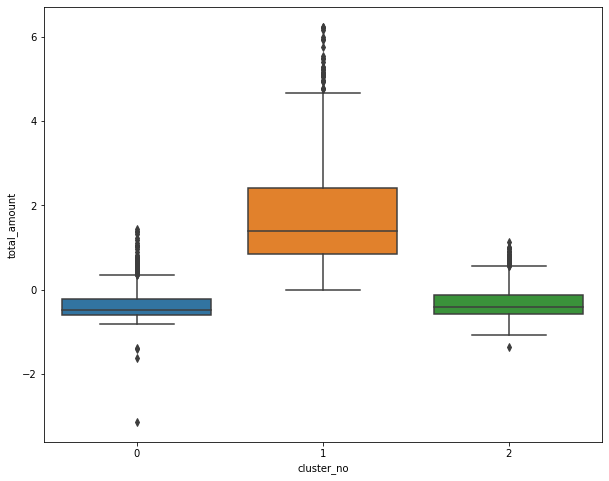

In [228]:
sns.boxplot(x='cluster_no', y='total_amount', data=df_l)


<AxesSubplot:xlabel='cluster_no', ylabel='frequency'>

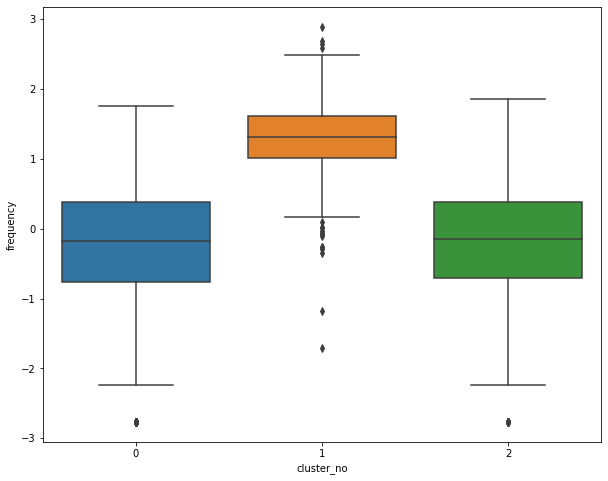

In [230]:
sns.boxplot(x='cluster_no', y='frequency', data=df_l)

<AxesSubplot:xlabel='cluster_no', ylabel='last_shopping_days'>

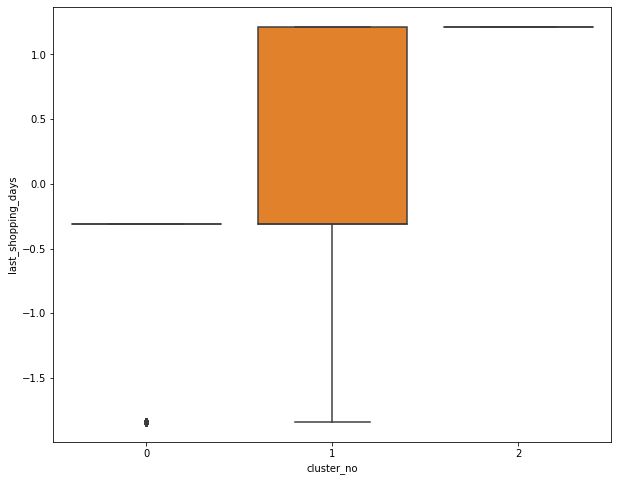

In [231]:
sns.boxplot(x='cluster_no', y='last_shopping_days', data=df_l)


#  Final Analysis¶
### Customer segmentation into three clusters.
K-Means Clustering with 3 Cluster's

### Customers with cluster_no 1 are the customers with high amount of transactions , high frequency but shops quiet often . - 
#### These customers visits online store very less days but they spend high amount in shopping.



### Customers with cluster_no 0 are frequent buyers , less amount of tracsaction , less frequency.
#### These customers visits online store often but they spend less amount and buys less items



### Customers with cluster_no 2 are not recent buyers and hence least of importance from business point of view.